#### Paquetes necesarios

In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Visualización de imagen almacenada en disco

(3693, 2954, 3)


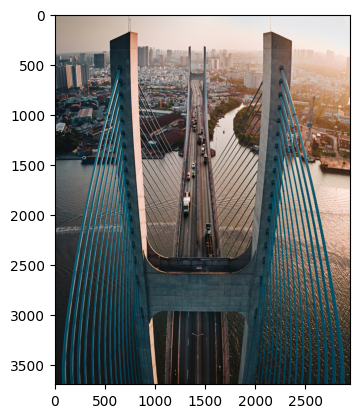

In [10]:
#Carga imagen desde disco
img = cv2.imread('Images/bridge.jpg') 

#Dimensiones
print(img.shape)

#Muestra imagen
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#### Modificación de los planos de la imagen almacenada en disco

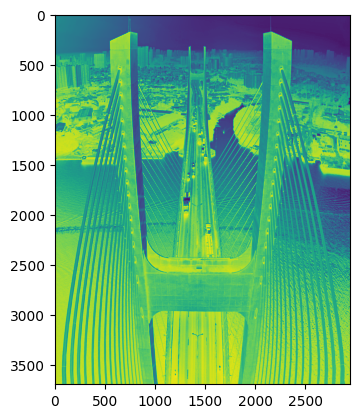

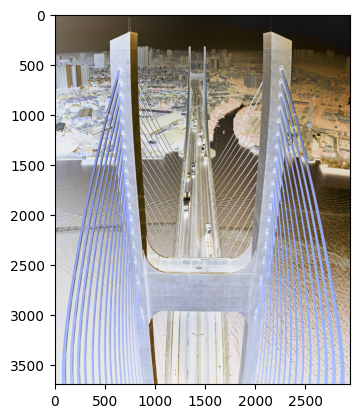

In [11]:
# Inversión de color del plano rojo
r = 255 - img_rgb[:,:,2]

# Inversión de color del plano verde
g = 255 - img_rgb[:,:,1]

# Inversión de color del plano azul
b = 255 - img_rgb[:,:,0]

# Se crea una imagen con los planos invertidos
inver_img = cv2.merge((r,g,b))

plt.imshow(r)
plt.show()

plt.imshow(inver_img)
plt.show()

#### Modificación de los tres planos de la imagen captada por la webcam

In [12]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # Variable ret para saber si hay fotograma y frame para capturar el fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos canales
        # CV lee en BGR, por lo que Azul es el canal 0, Verde el 1 y Rojo el 2
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        #Dimensiones (height, width, channels)
        h, w, c = frame.shape

        # Inversión de color del canal rojo
        r = 255 - r

        # Aumento de brillo del canal verde
        g = cv2.add(g, 50)

        # Efecto blur con filtro gaussiano en el canal azul
        b = cv2.GaussianBlur(b, (25, 25), 0)

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Webcam', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

#### Explicación de las modificaciones de los planos

A continuación, se llevará a cabo una breve explicación de las modificaciones que se han realizado en cada uno de los planos, además de comentar por qué la imagen se ve de esa manera al cambiar esos valores.

##### Modificación del plano rojo

En este caso, se ha llevado a cabo una **inversión del color** de este plano. Esto se consigue de la siguiente manera: `r = 255 - r`. 

De forma general, al restar 255 al valor del plano, se invierte el color. Por ejemplo, si el valor del plano es 0, 255 - 0 da como resultado 255, es decir, el valor contrario. De esta forma, las partes del plano que antes tenían un valor muy oscuro como es 0 pasarán a tener el valor más claro que es 255.

##### Modificación del plano verde

Para este canal, únicamente se ha **aumentado el brillo** del plano. Esto se consigue aumentando el valor de cada píxel del plano, lo cual puede hacerse con la función `add` de **OpenCV**. 

Aumentando en 50 cada uno de los valores correspondientes al canal, vemos con claridad el aumento de brillo que se ha producido en la imagen.

##### Modificación del plano azul

Por último, en el plano azul se ha aplicado una especie de **filtro** que difumina la imagen original. Esto se consigue a través de la función `GaussianBlur` de **OpenCV**. 

- `cv2.GaussianBlur()`: Esta es una función de OpenCV que se utiliza para aplicar un filtro de suavizado gaussiano a una imagen o a un canal de color. El suavizado gaussiano es una técnica que se utiliza para reducir el ruido en una imagen y también puede usarse para difuminar la imagen.

- `(15, 15)`: Estos son los parámetros que determinan el tamaño del núcleo del filtro gaussiano. En este caso, el núcleo tiene un tamaño de 15x15 píxeles. Cuanto mayor sea el tamaño del núcleo, más suave será el efecto de suavizado. Un núcleo más grande tiene un efecto de suavizado más fuerte.

- `0`: Este es la desviación estándar del filtro gaussiano. Un valor de 0 indica que OpenCV calculará automáticamente la desviación estándar en función del tamaño del núcleo

